# Projet 1 : Classification



# Resources

Termes Définitions et référence théorique:

[lien](./Resources.ipynb)


Dataset 
https://www.kaggle.com/bulentsiyah/dna-classification-code/comments#731589

https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit



# I. ML-algorithms

Here we discuss the different algorithms

```
You can use any ML-algorithm. It is not necessary that the algorithm was
discussed during the classes or covered in the course material. Also you do not
have to implement the algorithms yourself. You can use a library like scikit-learn.
In any case it is import that you give a brief explanation of the ML-algorithm
and the most important tunable parameters. In Section 4 example explanations
of the perceptron learning algorithm and the support vector machine are given.
```

Dans l'études des modèles, Il faut mentionner deux choses:
1. le fonctionnement
2. Les paramètre à modifier


## SVM
so
Support vector machine is a classic model for classification.
We are going to study three variant of the SVM. 

## SVM Linear

Before starting more advanced models we must first study the linear model. Because if a model cannot do better than the linear model, it is not intersting.




# Synthetic dataset

Here we generate and talk about the dataset in use.

```
> synthetic dataset: You can use the python module scipy.stats for that
purpose. It is preferable but not necessary that you generate the synthetic
data sets yourselves. The most important thing is that you can control the
data generation process. If you generate the data yourself you have that
control.

```

# Algorithm Comparaison

## In-sample error and out of sample error

> How do the ML-algorithms compare in terms of in-sample error and out of
sample error on the data sets used

## Other aspect of algorithms
 
> What is the impact of mislabeled training examples/outliers3 on the performance?

> What is the impact of class unbalances on the performance? In many
cases we have about the same number of examples of each class. In some
applications this is not the case, e.g. credit card fraud detection, intrusion
detection, etc.

> What happens when classes overlap? How does that affect the performance? Which transformations to the feature space work best?

> In case of SVM, what is the impact of class overlap, class unbalance and
mislabeled data on the number and location of support vectors?



# II. Real life project

In this section we show the application of algorithms on a real dataset.





# Oranges vs. Grapefruit
The task of separating oranges and grapefruit is fairly obvious to a human, but even with manual observation there is still a bit of error. 

# Dataset

This dataset takes the color, weight, and diameter of an "average" orange and grapefruit and generates a larger dataset containing a wide variety of values and are "oranges" and "grapefruit".

The dataset is mostly fictional. I'd love to collect real data, but for now measuring starting fruit and creating artificial samples from there seems adequate.
 

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
 
#!kaggle datasets download -d joshmcadams/oranges-vs-grapefruit

In [0]:
nRowsRead = None # specify 'None' if want to read whole file
# citrus.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/citrus.csv', delimiter=',', nrows = nRowsRead)
df_raw.dataframeName = 'citrus.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [0]:
df_raw.head(5)
 

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


# Correlation Matrix

In the next cell, we run a couple commands, wich compute and display the correlation coefficient between the columns of our dataset.


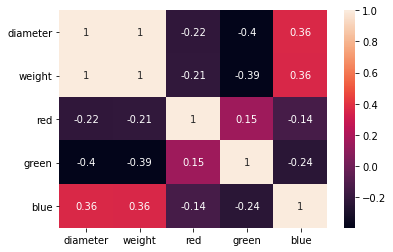

In [0]:
 

import matplotlib.pyplot as plt
import seaborn as sn
corrMatrix = df_raw.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

As we can see their is a high (1) correlation between the weight and the diameter of the observed fruits. The green color and the diameter are the least correlated value. These are the ones we choose further down the analysis.

# Dataset Plot

Let us diplay the point distribution.


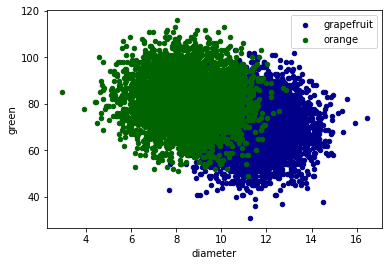

In [0]:
ls = ["grapefruit", "orange"]
x1 = "diameter"
x2 = "green"
for it, elem in enumerate(ls):
  df1 = df_raw.loc[df['name'] == elem]
  if it == 0:
    ax = df1.plot.scatter(x=x1, y=x2, color='DarkBlue', label=elem);
  else:
    df2.plot.scatter(x=x1, y=x2, color='DarkGreen', label=elem, ax=ax);
  

# Real life project

In this project we are going to analyse sequence of DNA and make a binary classification of promoter gene sequences based on their class (+ or -).

# Importing Data

In [0]:
import sys
import numpy
import sklearn
import pandas
import numpy as np
import pandas as pd

In [0]:


f = open("/content/drive/My Drive/Colab Notebooks/promoters.data")
lines = f.readlines()  # skip the header
data = []
for line in lines:
  data.append(line.split(","))



There is two class in the dataset:

the + and the -




In [0]:
print(data[0])

['+', 'S10', '\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt\n']


# Preprocessing

Les données à dispositions, sont sous format String. On veut les convertir sous format numérique. 

## 1. Suite de nucléotide

Tout d'abord on énumère la séquence d'ADN sous une suite de nucléotide qui la compose.

Le code ci dessous divise les séquence par nucléotide

In [0]:
# generate list of DNA sequences
sequencesList = list(elem[2] for elem in data)
 
nucleotidesList = []

classList = list(1 if elem[0] == "+" else 0  for elem in data)

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequencesList):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t' and x != "\n"]
    nucleotidesList.append(nucleotides)
 
 

In [0]:
print("nucleotides:", nucleotidesList[100])
print("class:", classList[100])

nucleotides: ['g', 'a', 'g', 'a', 'g', 'c', 'a', 't', 'g', 't', 'c', 'a', 'g', 'c', 'c', 't', 'c', 'g', 'a', 'c', 'a', 'a', 'c', 't', 't', 'g', 'c', 'a', 't', 'a', 'a', 'a', 't', 'g', 'c', 't', 't', 't', 'c', 't', 't', 'g', 't', 'a', 'g', 'a', 'c', 'g', 't', 'g', 'c', 'c', 'c', 't', 'a', 'c', 'g']
class: 0


Chaque séquence à une longeur de 58 nucléotide.

## 2. Vectorization

Etant donné les chaines de nucléotides, il nous faut les convertir sous forme numérique. Les bases sont codifiés d'après un codage simple a = 1, g = 2, c = 3, t = 4.

Ici, nous construisons une matrice à partir des vecteurs obtenus.

In [0]:
matrix = []

types = {
    "a" : 1,
    "g" : 2,
    "c" : 3,
    "t" : 4
}

for index, seqList in enumerate(nucleotidesList):
  tmp = []
  for elem in seqList:
    tmp.append(types[elem])
  matrix.append(tmp)

## 3.Some statistics 

Les données sont prêtes pour l'entrainement et le testing. Avant de passer à la suite, il y'a un tableau ci dessous qui reprend quelques informations qui peuvent nous être utile. 

Il est intéréssant de se familiariser avec le dataset afin de choisir la bonne méthode de machine learning.



In [0]:
print(matrix[:5])
print(len(matrix))

df = pd.DataFrame.from_records(matrix)
df.describe()



[[4, 1, 3, 4, 1, 2, 3, 1, 1, 4, 1, 3, 2, 3, 4, 4, 2, 3, 2, 4, 4, 3, 2, 2, 4, 2, 2, 4, 4, 1, 1, 2, 4, 1, 4, 2, 4, 1, 4, 1, 1, 4, 2, 3, 2, 3, 2, 2, 2, 3, 4, 4, 2, 4, 3, 2, 4], [4, 2, 3, 4, 1, 4, 3, 3, 4, 2, 1, 3, 1, 2, 4, 4, 2, 4, 3, 1, 3, 2, 3, 4, 2, 1, 4, 4, 2, 2, 4, 2, 4, 3, 2, 4, 4, 1, 3, 1, 1, 4, 3, 4, 1, 1, 3, 2, 3, 1, 4, 3, 2, 3, 3, 1, 1], [2, 4, 1, 3, 4, 1, 2, 1, 2, 1, 1, 3, 4, 1, 2, 4, 2, 3, 1, 4, 4, 1, 2, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 3, 1, 4, 2, 3, 4, 1, 1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 2], [1, 1, 4, 4, 2, 4, 2, 1, 4, 2, 4, 2, 4, 1, 4, 3, 2, 1, 1, 2, 4, 2, 4, 2, 4, 4, 2, 3, 2, 2, 1, 2, 4, 1, 2, 1, 4, 2, 4, 4, 1, 2, 1, 1, 4, 1, 3, 4, 1, 1, 3, 1, 1, 1, 3, 4, 3], [4, 3, 2, 1, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 4, 4, 2, 1, 3, 2, 1, 1, 1, 1, 2, 3, 4, 2, 1, 1, 1, 1, 3, 3, 1, 3, 4, 1, 2, 1, 1, 4, 2, 3, 2, 3, 3, 4, 3, 3, 2, 4, 2, 2, 4, 1, 2]]
106


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2.726415,2.377358,2.424528,2.566038,2.254717,2.226415,2.405660,2.471698,2.500000,2.396226,2.433962,2.641509,2.500000,2.528302,2.924528,3.084906,2.443396,2.235849,2.594340,2.386792,2.584906,2.386792,2.556604,2.575472,2.528302,2.433962,2.424528,2.726415,2.679245,2.273585,2.396226,2.386792,2.773585,2.764151,2.509434,2.660377,2.783019,2.547170,2.528302,2.207547,2.311321,2.698113,2.745283,2.783019,2.424528,2.509434,2.490566,2.575472,2.518868,2.584906,2.462264,2.669811,2.622642,2.660377,2.462264,2.594340,2.547170
std,1.191502,1.174757,1.154273,1.078084,1.138598,1.197482,1.240417,1.228298,1.220851,1.208535,1.249906,1.088369,1.205148,1.052955,1.239801,1.122225,0.995994,1.134329,1.093516,1.134488,1.194176,1.151155,1.087419,1.145992,1.188897,1.163074,1.112253,1.064877,1.108815,1.108693,1.239656,1.142852,1.189502,1.134329,1.131752,1.137138,1.171118,1.172154,1.251342,1.239946,1.229504,1.096920,1.187725,1.112738,1.154273,1.071228,1.106219,1.112253,1.044087,1.058912,1.105609,1.168815,1.174757,1.103128,1.088245,1.119339,1.188293
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.250000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.250000,2.000000,2.000000,1.250000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.250000,2.000000,2.000000,2.000000,1.000000,1.250000,2.000000,2.000000,2.000000,2.000000,1.250000
50%,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.500000,3.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.500000,2.500000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
75%,4.000000,3.000000,3.750000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.750000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.750000,4.000000,4.000000,4.000000,4.000000,3.750000,3.750000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.750000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000

In [0]:
series = []
for name in df.columns:
    series.append(df[name].value_counts())
    
info = pd.DataFrame(series)
info.columns = ['a', 'g', 'c', 't']
details = info.transpose()
print(details)

   0   1   2   3   4   5   6   7   8   ...  48  49  50  51  52  53  54  55  56
a  26  34  30  22  36  42  38  34  33  ...  23  24  28  27  25  22  26  24  27
g  15  24  28  28  29  22  17  20  19  ...  26  18  24  14  25  22  28  24  28
c  27  22  21  30  19  18  21  20  22  ...  36  42  31  32  21  32  29  29  17
t  38  26  27  26  22  24  30  32  32  ...  21  22  23  33  35  30  23  29  34

[4 rows x 57 columns]


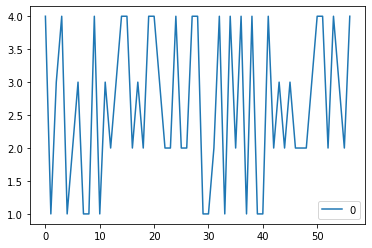

In [0]:
import matplotlib.pyplot as plt

pd.DataFrame(df[:1]).T.plot()
plt.show()

# Testing


In [0]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(matrix)
y = np.array(classList)

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

Let's start by observing the data at hand

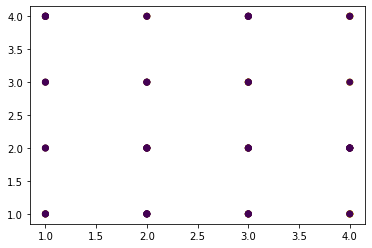

In [0]:
plt.scatter( X[:,11],X[:,21],c=y)
plt.show()

# Training

In [0]:


print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))

# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Numpy: 1.18.3
Sklearn: 0.22.2.post1
Pandas: 1.0.3


In [0]:
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


# Preprocessing Data 
 
Processing data before it's used to train a model. Preprocessing could be as simple as removing words from an English text corpus that don't occur in the English dictionary, or could be as complex as re-expressing data points in a way that eliminates as many attributes that are correlated with sensitive attributes as possible. Preprocessing can help satisfy fairness constraints.


In [0]:
# Building our Dataset by creating a custom Pandas DataFrame
# Each column in a DataFrame is called a Series. Lets start by making a series for each column.

classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [0]:
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [0]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8    ... 97  98  99  100 101 102 103 104 105
0    t   t   g   a   t   a   c   t   c  ...   c   t   a   g   c   g   c   c   t
1    a   g   t   a   c   g   a   t   g  ...   g   a   g   a   c   t   g   t   a
2    c   c   a   t   g   g   g   t   a  ...   c   t   a   g   t   a   c   c   a
3    t   t   c   t   a   g   g   c   c  ...   t   g   g   a   c   t   g   g   c
4    a   a   t   g   t   g   g   t   t  ...   a   a   g   g   a   t   a   t   a
5    g   t   a   t   a   c   g   a   t  ...   g   c   g   c   a   c   c   c   t
6    c   c   g   g   a   a   g   c   a  ...   g   c   t   a   t   t   t   c   t
7    a   c   a   a   t   a   t   a   a  ...   a   g   g   t   g   c   a   t   a
8    a   t   g   t   t   g   g   a   t  ...   c   a   t   g   g   a   c   c   a
9    t   g   a   g   a   g   g   a   a  ...   t   a   a   t   c   a   g   a   t
10   a   a   a   t   a   a   a   a   t  ...   t   c   c   c   c   c   a   a   a
11   c   c   c   g   c   g   g   c   a  

In [0]:
# transpose the DataFrame
df = dframe.transpose()
print(df.iloc[:5])

  0  1  2  3  4  5  6  7  8  9  10 11 12  ... 45 46 47 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  a  c  g  ...  c  g  g  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  a  c  a  ...  a  c  g  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  a  c  t  ...  a  a  c  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  t  g  t  ...  a  c  t  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  a  c  t  ...  c  c  t  c  c  g  t  g  g  t  a  g  +

[5 rows x 58 columns]


Les colonnes sont des séquence et les lignes sont des nucléotides.

In [0]:
# for clarity, lets rename the last dataframe column to class
df.rename(columns = {57: 'Class'}, inplace = True) 
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9 10 11  ... 46 47 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  a  c  ...  g  g  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  a  c  ...  c  g  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  a  c  ...  a  c  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  t  g  ...  c  t  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  a  c  ...  c  t  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [0]:
# looks good! Let's start to familiarize ourselves with the dataset so we can pick the most suitable 
# algorithms for this data

df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,a,c,t,c,t,t,g,a,c,a,t,a,g,t,t,g,g,t,t,a,a,a,t,t,a,t,t,t,t,a,a,t,t,t,g,c,c,c,c,c,c,t,t,c,c,c,t,-
freq,38,34,30,30,36,42,38,34,33,36,38,31,34,38,54,54,53,40,44,31,34,31,30,32,32,34,29,32,35,35,37,31,41,39,27,34,43,32,35,45,41,33,42,36,34,35,31,32,36,42,31,33,35,32,29,29,34,53


Le tableau suivant nous indique des statistiques sur nos données, nous pouvons appercevoir le nombre de séquence unique. 

Il y'a 4 base unique par séquence. a, c, t et g. 

La nucléotide t est le plus fréquents 

In [0]:
# desribe does not tell us enough information since the attributes are text. Lets record value counts for each sequence
series = []
for name in df.columns:
    series.append(df[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)

      0     1     2     3     4     5  ...    52    53    54    55    56  Class
t  38.0  26.0  27.0  26.0  22.0  24.0  ...  35.0  30.0  23.0  29.0  34.0    NaN
c  27.0  22.0  21.0  30.0  19.0  18.0  ...  21.0  32.0  29.0  29.0  17.0    NaN
a  26.0  34.0  30.0  22.0  36.0  42.0  ...  25.0  22.0  26.0  24.0  27.0    NaN
g  15.0  24.0  28.0  28.0  29.0  22.0  ...  25.0  22.0  28.0  24.0  28.0    NaN
-   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   53.0
+   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   53.0

[6 rows x 58 columns]


On compte le nombre d'occurence il y'a par base. On le fait pour chaque séquence d'ADN de notre dataset.

In [0]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch
# it to numerical data. This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,2_g,2_t,3_a,3_c,3_g,3_t,4_a,4_c,4_g,4_t,5_a,5_c,5_g,5_t,6_a,6_c,6_g,6_t,7_a,7_c,7_g,7_t,8_a,8_c,8_g,8_t,9_a,9_c,9_g,9_t,...,47_g,47_t,48_a,48_c,48_g,48_t,49_a,49_c,49_g,49_t,50_a,50_c,50_g,50_t,51_a,51_c,51_g,51_t,52_a,52_c,52_g,52_t,53_a,53_c,53_g,53_t,54_a,54_c,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0


A present il faut convertir les données dans un format dans lequel on pourra appliqué du machine learning. Le format d'entrée est convertir en un vecteur de 0 et 1. 

In [0]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(df.iloc[:5])

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  ...  55_g  55_t  56_a  56_c  56_g  56_t  Class
0    0    0    0    1    1    0    0  ...     1     0     0     0     0     1      1
1    0    0    0    1    0    0    1  ...     0     0     1     0     0     0      1
2    0    0    1    0    0    0    0  ...     0     0     0     0     1     0      1
3    1    0    0    0    1    0    0  ...     0     1     0     1     0     0      1
4    0    0    0    1    0    1    0  ...     0     0     0     0     1     0      1

[5 rows x 229 columns]


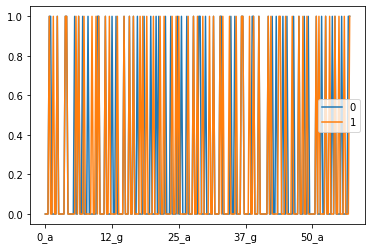

In [0]:
pd.DataFrame(df.iloc[:2]).T.plot()
plt.show()

# Training the model


In [0]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

# Testing


Plotting result 



In [0]:

from sklearn.decomposition import PCA

 
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


def plot(model, X_train, y_train):


  X = X_train
  y = y_train

  moyenne = np.mean(X, axis=0)

        #X = (X - X.min())/(X.max() - X.min())

  pca = PCA(n_components=2)
  pca.fit(X)
  X = pca.transform(X)

  x0 = np.array([x[0] for x in X])
  x1 = np.array([x[1] for x in X])

  x0_min, x0_max = x0.min() - 1, x0.max() + 1
  x1_min, x1_max = x1.min() - 1, x1.max() + 1

  h1 = x0_max-abs(x0_min)
  h2 = x1_max-abs(x1_min)
  f = 30


  h1 = h1/f
  h2 = h2/f
  xx1, xx0 = np.meshgrid(np.arange(x0_min, x0_max, h1),np.arange(x1_min, x1_max, h2))

  nComp = 2

  XX = np.c_[xx1.ravel(), xx0.ravel()]

  XX = np.dot(XX[:, :nComp], pca.components_[:nComp, :])

  XX += moyenne


 
  model.fit(X_train, y_train)
#predictions = model.predict(X_test)
  Z = model.predict(XX)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx0, Z, cmap=plt.cm.coolwarm, alpha=0.9)


  plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, alpha=0.6)

  plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Nearest Neighbors: 0.823214 (0.113908)


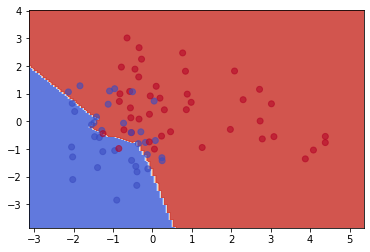

Test--  Nearest Neighbors :  0.7777777777777778

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Gaussian Process: 0.873214 (0.056158)


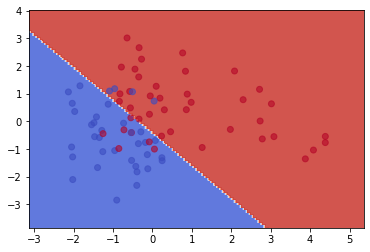

Test--  Gaussian Process :  0.8888888888888888

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree: 0.710714 (0.229629)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


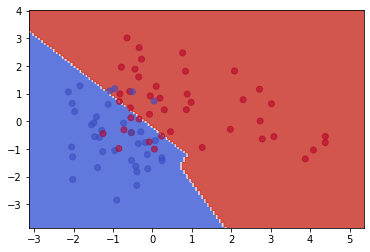

Test--  Decision Tree :  0.7777777777777778

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.64      0.90      0.75        10

    accuracy                           0.78        27
   macro avg       0.78      0.80      0.78        27
weighted avg       0.82      0.78      0.78        27

Random Forest: 0.594643 (0.165802)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


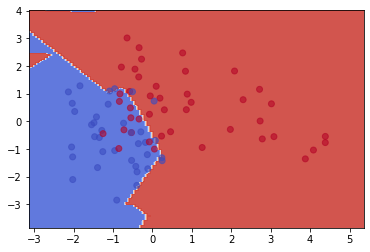

Test--  Random Forest :  0.6296296296296297

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.50      0.90      0.64        10

    accuracy                           0.63        27
   macro avg       0.69      0.69      0.63        27
weighted avg       0.74      0.63      0.63        27



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

Neural Net: 0.862500 (0.117925)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


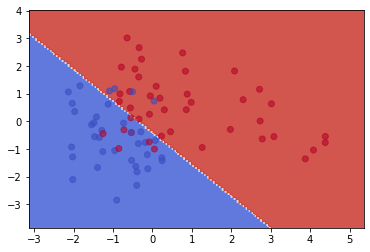

Test--  Neural Net :  0.9259259259259259

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost: 0.912500 (0.112500)


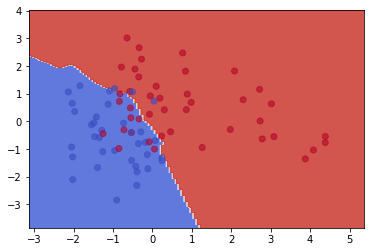

Test--  AdaBoost :  0.8518518518518519

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.71      1.00      0.83        10

    accuracy                           0.85        27
   macro avg       0.86      0.88      0.85        27
weighted avg       0.89      0.85      0.85        27

Naive Bayes: 0.837500 (0.137500)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


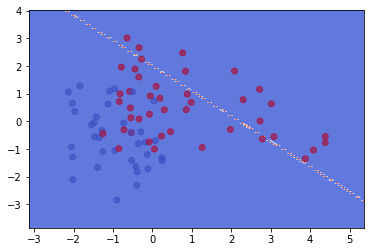

Test--  Naive Bayes :  0.9259259259259259

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27

SVM Linear: 0.850000 (0.108972)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


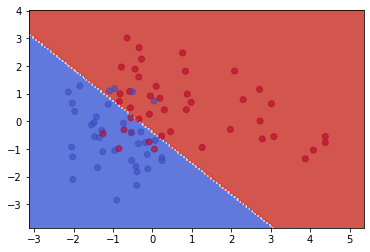

Test--  SVM Linear :  0.9629629629629629

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

SVM RBF: 0.887500 (0.067315)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


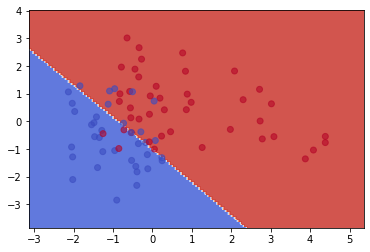

Test--  SVM RBF :  0.9259259259259259

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27

SVM Sigmoid: 0.900000 (0.093541)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


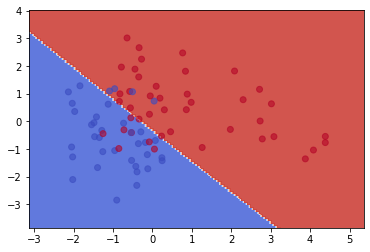

Test--  SVM Sigmoid :  0.9259259259259259

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



In [0]:
# Now that we have our dataset, we can start building algorithms! We'll need to import each algorithm we plan on using
# from sklearn.  We also need to import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'), 
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train, y_train)
    plot(model, X_train, y_train)
    predictions = model.predict(X_test)
    print('Test-- ',name,': ',accuracy_score(y_test, predictions))
    print()
    print(classification_report(y_test, predictions))

In [0]:
class Plotter():
 
  def setup(self, X, h=0.2):

      self.x_min, self.x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      self.y_min, self.y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

      self.xx, self.yy = np.meshgrid(np.arange(self.x_min, self.x_max, h),
                          np.arange(self.y_min, self.y_max, h))

      # just plot the dataset first
      self.cm = plt.cm.RdBu
      self.cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      figure = plt.figure(figsize=(27, 9))

  def plot(self):

    plt.tight_layout() 
    plt.show()

  def plot_result(self, X_train, y_train, X_test, y_test, clf):
      xx, yy = self.xx, self.yy
      cm, cm_bright = self.cm, self.cm_bright
      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      if hasattr(clf, "decision_function"):
          Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
      else:
          Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)

      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

      ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())

      score = clf.score(X_test, y_test)    

      if ds_cnt == 0:
          ax.set_title(name)
      ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
              size=15, horizontalalignment='right')

  def plot_data_set(self, X, y, X_train,y_train, ds_cnt ):
      xx, yy = self.xx, self.yy

      cm_bright = self.cm_bright
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.9,
                edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())

In [0]:

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_friedman1, make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM","Sigmoid SVC",  "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),  
    SVC(kernel = 'sigmoid'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [ 
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            
            linearly_separable
            ]


i = 1
# iterate over datasets

plotter = Plotter()

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    plotter.setup(X)
    plotter.plot_data_set(X, y, X_train,y_train, ds_cnt)

    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        plotter.plot_result(X_train, y_train, X_test, y_test, clf)
        i += 1

plotter.plot()



NameError: ignored